In [136]:
import tensorflow as tf

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from PIL import Image

import time

In [176]:
birdpic = Image.open("./data/bird4.jpg")

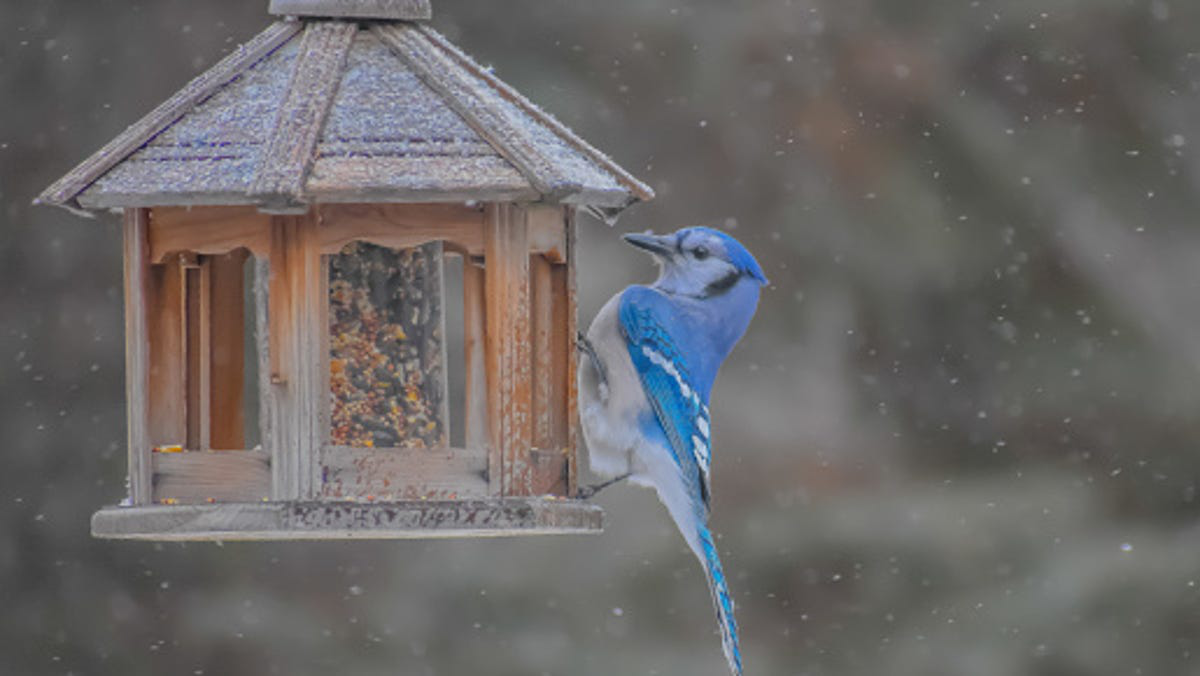

In [177]:
birdpic

In [8]:
interpreter = tf.lite.Interpreter("./models/inception_resnet_v2_2018_04_27/inception_resnet_v2.tflite")

In [10]:
interpreter.get_input_details()

[{'name': 'input',
  'index': 634,
  'shape': array([  1, 299, 299,   3], dtype=int32),
  'shape_signature': array([  1, 299, 299,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

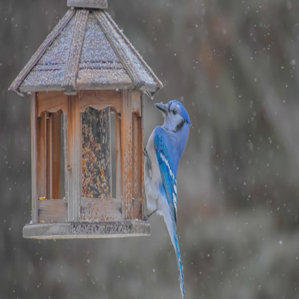

In [179]:
birdpic.resize((interpreter.get_input_details()[0]['shape'][1:3]))

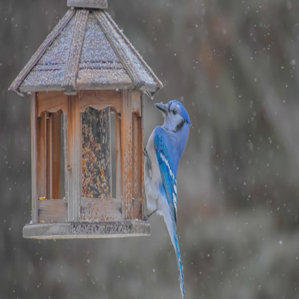

In [180]:
birdpic.resize((299,299))

In [182]:
resized_input = np.asarray(birdpic.resize((299,299)), dtype = np.float32).reshape((1, 299,299, 3))
resized_input

array([[[[78., 78., 78.],
         [77., 77., 77.],
         [75., 75., 75.],
         ...,
         [94., 95., 90.],
         [93., 94., 89.],
         [93., 94., 89.]],

        [[79., 79., 79.],
         [78., 78., 78.],
         [77., 77., 77.],
         ...,
         [94., 95., 90.],
         [93., 94., 89.],
         [93., 94., 89.]],

        [[81., 81., 81.],
         [80., 80., 80.],
         [78., 78., 78.],
         ...,
         [94., 95., 90.],
         [93., 94., 89.],
         [93., 94., 89.]],

        ...,

        [[76., 76., 76.],
         [76., 76., 76.],
         [74., 74., 74.],
         ...,
         [87., 88., 83.],
         [90., 91., 86.],
         [91., 92., 87.]],

        [[77., 77., 77.],
         [76., 76., 76.],
         [75., 75., 75.],
         ...,
         [89., 90., 85.],
         [92., 93., 88.],
         [93., 94., 89.]],

        [[77., 77., 77.],
         [76., 76., 76.],
         [75., 75., 75.],
         ...,
         [89., 90., 85.],
        

In [183]:
resized_input = (resized_input - np.mean(resized_input))/np.std(resized_input)

In [184]:
interpreter.allocate_tensors()

In [185]:
interpreter.set_tensor(interpreter.get_input_details()[0]['index'], resized_input)

In [186]:
interpreter.invoke()

In [187]:
interpreter.get_output_details()

[{'name': 'InceptionResnetV2/AuxLogits/Logits/BiasAdd',
  'index': 7,
  'shape': array([   1, 1001], dtype=int32),
  'shape_signature': array([   1, 1001], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [149]:
with open("./models/inception_resnet_v2_2018_04_27/labels.txt") as label_file:
    labels = [x.strip() for x in label_file.readlines()]

In [150]:
labels

['background',
 'tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python'

In [188]:
output_data = interpreter.get_tensor(interpreter.get_output_details()[0]['index'])

In [189]:
output_data[0]

array([ 0.20995918, -0.62021613,  1.3785088 , ..., -0.83371836,
        0.15767565,  0.43394682], dtype=float32)

In [190]:
labeled_preds = list(zip(labels, output_data[0]))

In [191]:
for elem in labeled_preds:
    print(elem)

('background', 0.20995918)
('tench', -0.62021613)
('goldfish', 1.3785088)
('great white shark', -0.10388774)
('tiger shark', -0.6804434)
('hammerhead', -0.90215313)
('electric ray', -0.68337154)
('stingray', 0.6795579)
('cock', 0.609478)
('hen', 0.410623)
('ostrich', 1.3140461)
('brambling', 0.17295384)
('goldfinch', 3.6252563)
('house finch', 2.401932)
('junco', -0.5588712)
('indigo bunting', 4.418724)
('robin', -0.05301258)
('bulbul', 0.46093035)
('jay', 6.8523626)
('magpie', 1.513546)
('chickadee', 3.2971175)
('water ouzel', 0.8220538)
('kite', 0.06531191)
('bald eagle', -0.7950744)
('vulture', -1.8300902)
('great grey owl', 0.014669657)
('European fire salamander', -0.09206051)
('common newt', -0.6555666)
('eft', 0.16361071)
('spotted salamander', 1.4093919)
('axolotl', -0.16017736)
('bullfrog', -0.6074126)
('tree frog', 0.9787207)
('tailed frog', -0.7687566)
('loggerhead', -0.57159686)
('leatherback turtle', 0.4752401)
('mud turtle', -0.44358444)
('terrapin', 0.13415149)
('box tur

In [192]:
labeled_preds_df = pd.DataFrame(labeled_preds, columns = ["Label", "conf"])

In [193]:
labeled_preds_df

,Label,conf
0,background,0.209959
1,tench,-0.620216
2,goldfish,1.378509
3,great white shark,-0.103888
4,tiger shark,-0.680443
...,...,...
996,earthstar,-0.575919
997,hen-of-the-woods,-1.571303
998,bolete,-0.833718
999,ear,0.157676


In [194]:
labeled_preds_df.sort_values(by = "conf", ascending=False).iloc[:20,:]

,Label,conf
18,jay,6.852363
449,birdhouse,5.091703
15,indigo bunting,4.418724
495,chime,4.332941
12,goldfinch,3.625256
132,little blue heron,3.602335
20,chickadee,3.297117
847,table lamp,3.263506
450,boathouse,3.211499
93,bee eater,3.044894


In [128]:
with open("./data/list_of_birds.txt") as f:
    birdnames = set([x.strip() for x in f.readlines()])

In [129]:
birdnames

{'accentor',
 'adjutant',
 'albatross',
 'alethe',
 'anhinga',
 'ani',
 'antbird',
 'antpitta',
 'antshrike',
 'antthrush',
 'antwren',
 'apalis',
 'apostlebird',
 'aracari',
 'argus',
 'asity',
 'astrapia',
 'auk',
 'auklet',
 'avocet',
 'avocetbill',
 'awlbill',
 'babbler',
 'bananaquit',
 'barbet',
 'barbthroat',
 'bare-eye',
 'bateleur',
 'batis',
 'baza',
 'bee-eater',
 'bellbird',
 'bernieria',
 'berrypecker',
 'besra',
 'bird-of-paradise',
 'bittern',
 'blackbird',
 'blackcap',
 'blackeye',
 'bleeding-heart',
 'blossomcrown',
 'bluebill',
 'bluebird',
 'bluethroat',
 'boatbill',
 'bobolink',
 'bobwhite',
 'bokmakierie',
 'boobook',
 'booby',
 'bowerbird',
 'brambling',
 'brilliant',
 'bristlebill',
 'bristlebird',
 'bristlefront',
 'bristlehead',
 'broadbill',
 'bronzewing',
 'brushturkey',
 'bufflehead',
 'bulbul',
 'bullfinch',
 'bunting',
 'bush-hen',
 'bushchat',
 'bushshrike',
 'bushtit',
 'bustard',
 'butcherbird',
 'buttonquail',
 'buzzard',
 'cachalote',
 'cacique',
 'ca

In [135]:
for pred in list(labeled_preds_df.sort_values(by = "conf", ascending=False).iloc[:5,0]):
    if pred in birdnames:
        print("It's a bird!")
        break

It's a bird!


In [139]:
time.time()

1630602821.4109821

In [140]:
last_tweet = time.time()

In [141]:
time.time() - last_tweet

12.219443798065186